In [10]:
import plotly.graph_objects as go
import pandas as pd

# Assuming your DataFrame is named df
# Replace 'your_dataframe.csv' with the actual filename or provide the DataFrame directly if it's in-memory

# Example DataFrame creation
data = {'category': ['A', 'B', 'C', 'A', 'B', 'C'],
        'Year': [2019, 2019, 2019, 2020, 2020, 2020],
        'Values': [10, 20, 30, 15, 25, 35]}
df = pd.DataFrame(data)

# Get unique years for slider
years = df['Year'].unique()

# Create initial figure
fig = go.Figure()

# Add donut chart for the initial year
fig.add_trace(go.Pie(labels=df[df['Year'] == years[0]]['category'],
                     values=df[df['Year'] == years[0]]['Values'],
                     hole=0.4,
                     textinfo='percent+label',
                     pull=[0, 0.1, 0],
                     name=str(years[0])))

# Update layout for better visualization
fig.update_layout(title='Animated Donut Chart', updatemenus=[dict(type='buttons', showactive=False, buttons=[])])

# Add slider
fig.update_layout(sliders=[{
    'steps': [{'args': [[str(year)]], 'label': str(year), 'method': 'animate'} for year in years],
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 16},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'}
}])

# Update frames for animation
frames = [go.Frame(data=[go.Pie(labels=df[df['Year'] == year]['category'],
                                values=df[df['Year'] == year]['Values'],
                                hole=0.4,
                                textinfo='percent+label',
                                pull=[0, 0.1, 0],
                                name=str(year))],
                   name=str(year)) for year in years]
fig.frames = frames

# Show the plot
fig.show()


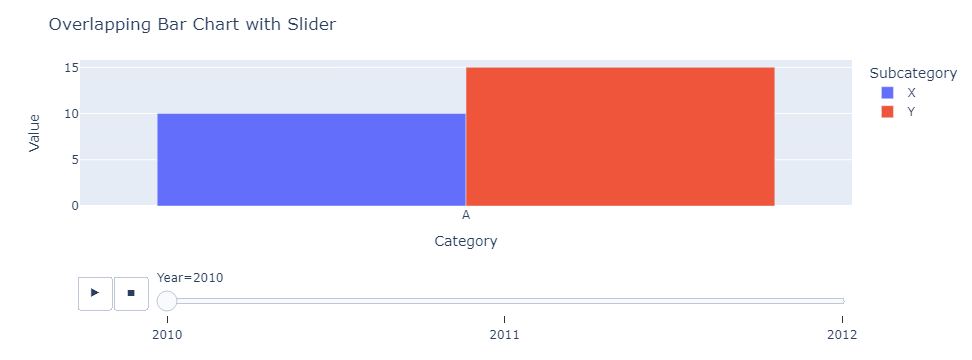

In [31]:
import pandas as pd
import plotly.express as px

# Create DataFrame
data = {
    'Category': ['A', 'A', 'B', 'B', 'C', 'C','A'],
    'Subcategory': ['X', 'Y', 'X', 'Y', 'X', 'Y',"X"],
    'Year': [2010, 2010, 2011, 2011, 2012, 2012,2012],
    'Value': [10, 15, 20, 25, 30, 35,20]
}
df = pd.DataFrame(data)

# Create overlapping bar chart with slider
fig = px.bar(df, x='Category', y='Value', color='Subcategory',
             animation_frame='Year', barmode='group')

# Update layout for better visibility
fig.update_layout(
    xaxis=dict(title='Category'),
    yaxis=dict(title='Value'),
    title='Overlapping Bar Chart with Slider',
    barmode='group'
)

# Show the plot
fig.show()


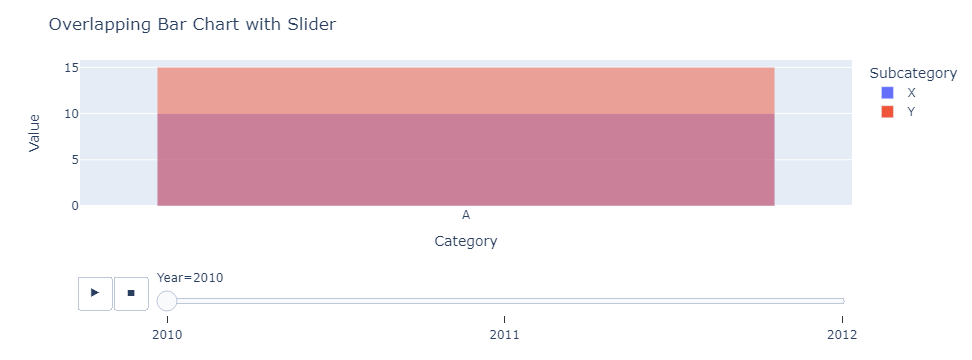

In [29]:
import pandas as pd
import plotly.express as px

# Create DataFrame
data = {
    'Category': ['A', 'A', 'B', 'B', 'C', 'C','A'],
    'Subcategory': ['X', 'Y', 'X', 'Y', 'X', 'Y',"X"],
    'Year': [2010, 2010, 2011, 2011, 2012, 2012,2012],
    'Value': [10, 15, 20, 25, 30, 35,20]
}
df = pd.DataFrame(data)

# Create overlapping bar chart with slider
fig = px.bar(df, x='Category', y='Value', color='Subcategory',
             animation_frame='Year', barmode='overlay')

# Update layout for better visibility
fig.update_layout(
    xaxis=dict(title='Category'),
    yaxis=dict(title='Value'),
    title='Overlapping Bar Chart with Slider',
    barmode='overlay'  # Set barmode to 'overlay'
)

# Show the plot
fig.show()


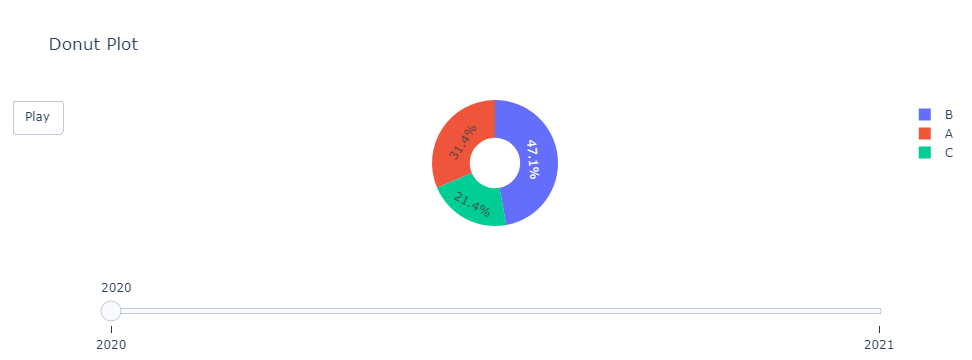

In [42]:
import plotly.graph_objects as go
import pandas as pd

# Sample DataFrame creation
data = {'category': ['A', 'B', 'C', 'A', 'B', 'C'],
        'subcategory': ['X', 'Y', 'Z', 'X', 'Y', 'Z'],
        'year': [2020, 2020, 2020, 2021, 2021, 2021],
        'value': [10, 15, 8, 12, 18, 7]}

df = pd.DataFrame(data)

# Extract unique years
years = df['year'].unique()

# Initialize Figure
fig = go.Figure()

# Create initial donut plot
fig.add_trace(go.Pie(labels=df['category'], values=df['value'], hole=0.4, name='2020'))

# Add frames for animation
frames = [go.Frame(data=[go.Pie(labels=df[df['year'] == year]['category'],
                                 values=df[df['year'] == year]['value'],
                                 hole=0.4,
                                 name=str(year))],
                   name=str(year)) for year in years]

fig.frames = frames

# Add slider
steps = [dict(args=[[str(year)]], label=str(year), method='animate') for year in years]

sliders = [dict(active=0, steps=steps, pad={"t": 50})]

fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                method='animate', args=[None, dict(frame=dict(duration=300, redraw=True), fromcurrent=True)])])],
                  sliders=sliders, title='Donut Plot')

# Show the plot
fig.show()
